# Global Health Analytics: Tuberculosis Case Study

## Project Overview

This project focuses on the analysis of tuberculosis incidence using recent case data, with the objective of supporting data-driven decision-making in a global health context. The analysis is framed within the scope of international public health monitoring, simulating a data analysis workflow aligned with the needs of organizations such as the World Health Organization (WHO).

The project aims to prepare, analyze, and interpret tuberculosis case data in order to assess the current state of the disease, identify regional and country-level trends, and highlight areas where progress has been achieved or where additional intervention is required.

## Key Questions

 - How many tuberculosis cases are reported globally each year?

 - Which regions report the highest number of tuberculosis cases?

 - Which countries show increasing or decreasing trends in recent years?

 - Which countries are projected to experience changes in incidence in the coming years?

 - What proportion of cases corresponds to pulmonary versus extrapulmonary tuberculosis?

In [1]:
# import libraries 

import pandas as pd
import numpy as np

In [2]:
# load datasets

who = pd.read_csv('who.csv')
population = pd.read_csv('population.csv')

In [3]:
who.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
population.head()

,country,year,population
0,Afghanistan,1995,17586073
1,Afghanistan,1996,18415307
2,Afghanistan,1997,19021226
3,Afghanistan,1998,19496836
4,Afghanistan,1999,19987071


In [5]:
who.columns

Index(['country', 'iso2', 'iso3', 'year', 'new_sp_m014', 'new_sp_m1524',
       'new_sp_m2534', 'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564',
       'new_sp_m65', 'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534',
       'new_sp_f3544', 'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65',
       'new_sn_m014', 'new_sn_m1524', 'new_sn_m2534', 'new_sn_m3544',
       'new_sn_m4554', 'new_sn_m5564', 'new_sn_m65', 'new_sn_f014',
       'new_sn_f1524', 'new_sn_f2534', 'new_sn_f3544', 'new_sn_f4554',
       'new_sn_f5564', 'new_sn_f65', 'new_ep_m014', 'new_ep_m1524',
       'new_ep_m2534', 'new_ep_m3544', 'new_ep_m4554', 'new_ep_m5564',
       'new_ep_m65', 'new_ep_f014', 'new_ep_f1524', 'new_ep_f2534',
       'new_ep_f3544', 'new_ep_f4554', 'new_ep_f5564', 'new_ep_f65',
       'newrel_m014', 'newrel_m1524', 'newrel_m2534', 'newrel_m3544',
       'newrel_m4554', 'newrel_m5564', 'newrel_m65', 'newrel_f014',
       'newrel_f1524', 'newrel_f2534', 'newrel_f3544', 'newrel_f4554',
       'newrel_f5564', 'n

In [6]:
population.columns

Index(['country', 'year', 'population'], dtype='object')

### Null values

In [7]:
# nulls summary 
who.isna().sum()

country            0
iso2              34
iso3               0
year               0
new_sp_m014     4067
new_sp_m1524    4031
new_sp_m2534    4034
new_sp_m3544    4021
new_sp_m4554    4017
new_sp_m5564    4022
new_sp_m65      4031
new_sp_f014     4066
new_sp_f1524    4046
new_sp_f2534    4040
new_sp_f3544    4041
new_sp_f4554    4036
new_sp_f5564    4045
new_sp_f65      4043
new_sn_m014     6195
new_sn_m1524    6210
new_sn_m2534    6218
new_sn_m3544    6215
new_sn_m4554    6213
new_sn_m5564    6219
new_sn_m65      6220
new_sn_f014     6200
new_sn_f1524    6218
new_sn_f2534    6224
new_sn_f3544    6220
new_sn_f4554    6222
new_sn_f5564    6223
new_sn_f65      6221
new_ep_m014     6202
new_ep_m1524    6214
new_ep_m2534    6220
new_ep_m3544    6216
new_ep_m4554    6220
new_ep_m5564    6225
new_ep_m65      6222
new_ep_f014     6208
new_ep_f1524    6219
new_ep_f2534    6219
new_ep_f3544    6219
new_ep_f4554    6223
new_ep_f5564    6223
new_ep_f65      6226
newrel_m014     7050
newrel_m1524 

In [8]:
# Filter for missing values
who[who.iso2.isna()]

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
4369,Namibia,NaN,NAM,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4370,Namibia,NaN,NAM,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4371,Namibia,NaN,NAM,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4372,Namibia,NaN,NAM,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4373,Namibia,NaN,NAM,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4374,Namibia,NaN,NAM,1985,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4375,Namibia,NaN,NAM,1986,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4376,Namibia,NaN,NAM,1987,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4377,Namibia,NaN,NAM,1988,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4378,Namibia,NaN,NAM,1989,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Missing values of iso2 field for country = Namibia, are filled with a "NA" string
who.loc[who.country == "Namibia", "iso2"] = "NA"

In [10]:
# The rest of the missing values, are filled with a "0" value
who = who.fillna(0)

In [11]:
# Nulls summary 
population.isna().sum()

country       0
year          0
population    0
dtype: int64

In [12]:
# Modify data structure 
who2 = who.melt(id_vars=["country", "year", "iso2", "iso3"])
who2.head(10)

,country,year,iso2,iso3,variable,value
0,Afghanistan,1980,AF,AFG,new_sp_m014,0.0
1,Afghanistan,1981,AF,AFG,new_sp_m014,0.0
2,Afghanistan,1982,AF,AFG,new_sp_m014,0.0
3,Afghanistan,1983,AF,AFG,new_sp_m014,0.0
4,Afghanistan,1984,AF,AFG,new_sp_m014,0.0
5,Afghanistan,1985,AF,AFG,new_sp_m014,0.0
6,Afghanistan,1986,AF,AFG,new_sp_m014,0.0
7,Afghanistan,1987,AF,AFG,new_sp_m014,0.0
8,Afghanistan,1988,AF,AFG,new_sp_m014,0.0
9,Afghanistan,1989,AF,AFG,new_sp_m014,0.0


In [13]:
# Add "gender" column
who2["gender"] = np.where(who2["variable"].str.contains("m"), "masculino", "femenino")
who2.head(10)

,country,year,iso2,iso3,variable,value,gender
0,Afghanistan,1980,AF,AFG,new_sp_m014,0.0,masculino
1,Afghanistan,1981,AF,AFG,new_sp_m014,0.0,masculino
2,Afghanistan,1982,AF,AFG,new_sp_m014,0.0,masculino
3,Afghanistan,1983,AF,AFG,new_sp_m014,0.0,masculino
4,Afghanistan,1984,AF,AFG,new_sp_m014,0.0,masculino
5,Afghanistan,1985,AF,AFG,new_sp_m014,0.0,masculino
6,Afghanistan,1986,AF,AFG,new_sp_m014,0.0,masculino
7,Afghanistan,1987,AF,AFG,new_sp_m014,0.0,masculino
8,Afghanistan,1988,AF,AFG,new_sp_m014,0.0,masculino
9,Afghanistan,1989,AF,AFG,new_sp_m014,0.0,masculino


In [14]:
# Assign group by age 
def asignar_groupedad(valor):
  if "014" in valor:
     return "0-14"
  elif "1524" in valor:
    return "15-24"
  elif "25-34" in valor:
    return "25-34"
  elif "3544" in valor:
    return "35-44"
  elif "4554" in valor:
    return "45-54"
  elif "5564" in valor:
    return "55-64"
  elif "65" in valor:
    return "65+"

In [15]:
who2["agegroup"] = who2["variable"].apply(asignar_groupedad)
who2.head()

,country,year,iso2,iso3,variable,value,gender,agegroup
0,Afghanistan,1980,AF,AFG,new_sp_m014,0.0,masculino,0-14
1,Afghanistan,1981,AF,AFG,new_sp_m014,0.0,masculino,0-14
2,Afghanistan,1982,AF,AFG,new_sp_m014,0.0,masculino,0-14
3,Afghanistan,1983,AF,AFG,new_sp_m014,0.0,masculino,0-14
4,Afghanistan,1984,AF,AFG,new_sp_m014,0.0,masculino,0-14


In [16]:
# Assign diagnostic methods

def asignar_metodo(valor):
  if "rel" in valor:
    return "recaida"
  if "sn" in valor:
    return "esputo pulmonar negativo"
  if "sp" in valor:
    return "esputo pulmonar positivo"
  if "ep" in valor:
    return "extrapulmonar"

In [17]:
who2["method"] = who2["variable"].apply(asignar_metodo)
who2.head()

,country,year,iso2,iso3,variable,value,gender,agegroup,method
0,Afghanistan,1980,AF,AFG,new_sp_m014,0.0,masculino,0-14,esputo pulmonar positivo
1,Afghanistan,1981,AF,AFG,new_sp_m014,0.0,masculino,0-14,esputo pulmonar positivo
2,Afghanistan,1982,AF,AFG,new_sp_m014,0.0,masculino,0-14,esputo pulmonar positivo
3,Afghanistan,1983,AF,AFG,new_sp_m014,0.0,masculino,0-14,esputo pulmonar positivo
4,Afghanistan,1984,AF,AFG,new_sp_m014,0.0,masculino,0-14,esputo pulmonar positivo


In [18]:
who2 = who2.drop(columns=["variable"])

In [19]:
who2.head()

,country,year,iso2,iso3,value,gender,agegroup,method
0,Afghanistan,1980,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo
1,Afghanistan,1981,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo
2,Afghanistan,1982,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo
3,Afghanistan,1983,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo
4,Afghanistan,1984,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo


In [20]:
# Merge datasets (who2 & population) 
df = pd.merge(left=who2, right=population, how="inner", on=["country", "year"])
df.head()

,country,year,iso2,iso3,value,gender,agegroup,method,population
0,Afghanistan,1995,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo,17586073
1,Afghanistan,1995,AF,AFG,0.0,masculino,15-24,esputo pulmonar positivo,17586073
2,Afghanistan,1995,AF,AFG,0.0,masculino,None,esputo pulmonar positivo,17586073
3,Afghanistan,1995,AF,AFG,0.0,masculino,35-44,esputo pulmonar positivo,17586073
4,Afghanistan,1995,AF,AFG,0.0,masculino,45-54,esputo pulmonar positivo,17586073


In [21]:
# Dataset description

print("Initial analysis of the dataset")
print(f"Dataset dimensions: {df.shape}")
print(df.head)

print("\nDataset information")
print(df.info())

print("\nDataset statistics")
print(df.describe())

Initial analysis of the dataset
Dataset dimensions: (226072, 9)
<bound method NDFrame.head of             country  year iso2 iso3   value     gender agegroup  \
0       Afghanistan  1995   AF  AFG     0.0  masculino     0-14   
1       Afghanistan  1995   AF  AFG     0.0  masculino    15-24   
2       Afghanistan  1995   AF  AFG     0.0  masculino     None   
3       Afghanistan  1995   AF  AFG     0.0  masculino    35-44   
4       Afghanistan  1995   AF  AFG     0.0  masculino    45-54   
...             ...   ...  ...  ...     ...        ...      ...   
226067     Zimbabwe  2013   ZW  ZWE  4649.0   femenino     None   
226068     Zimbabwe  2013   ZW  ZWE  3526.0   femenino    35-44   
226069     Zimbabwe  2013   ZW  ZWE  1453.0   femenino    45-54   
226070     Zimbabwe  2013   ZW  ZWE   811.0   femenino    55-64   
226071     Zimbabwe  2013   ZW  ZWE   725.0   femenino      65+   

                          method  population  
0       esputo pulmonar positivo    17586073  
1      

### Correlation Matrix

In [22]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("Columnas numéricas:", num_cols.tolist())

Columnas numéricas: ['year', 'value', 'population']


In [23]:
# importar libraries

import matplotlib.pyplot as plt
import seaborn as sns

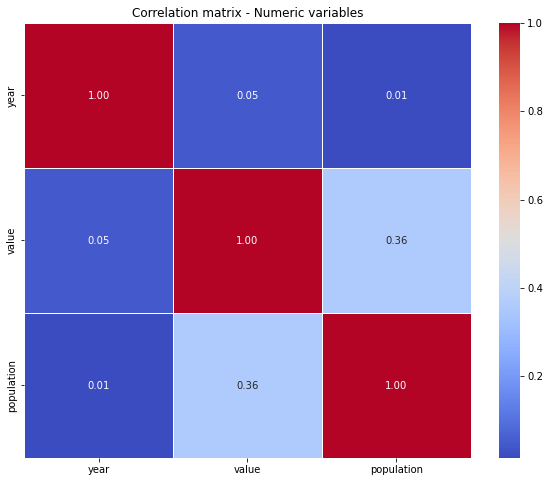

In [24]:
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation matrix - Numeric variables")
plt.show()

### Outliers

In [25]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("Numeric columns:", num_cols.tolist())

Numeric columns: ['year', 'value', 'population']


In [26]:
#selección de la columna 'population' para identificar los outliers

limite_inf = df['population'].quantile(0.025)
limite_sup = df['population'].quantile(0.975)

print(f"lower limit 'value': {limite_inf} upper limit 'value': {limite_sup}")

lower limit 'value': 11071.0 upper limit 'value': 166925457.0


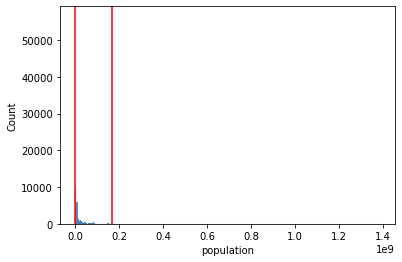

In [27]:
sns.histplot(df['population'], kde=False)
plt.axvline(limite_inf, color='r')
plt.axvline(limite_sup, color='r')
plt.show()

### Linear regression model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

df_model = df.dropna(subset=['year', 'population', 'value'])

X = df_model[['year', 'population']]
y = df_model['value']

# (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Score en test:", lr.score(X_test, y_test))


Score en test: 0.1487579491365434


In [29]:
lr2 = LinearRegression()
lr2.fit(X, y)
print("Score global:", lr2.score(X, y))

Score global: 0.1308173084027381


### Data Visualization

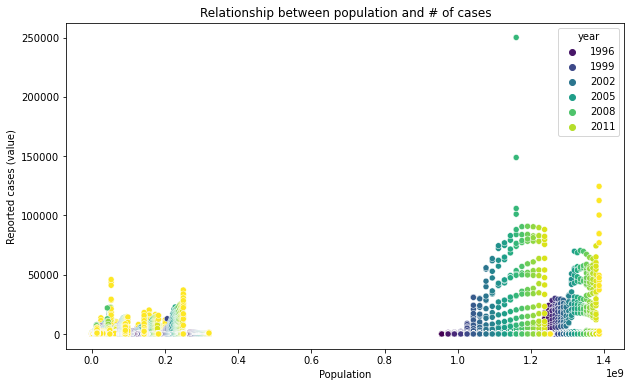

In [30]:
# scatterplot
# relationship between population and # of cases

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='population', y='value', hue='year', palette='viridis')
plt.title("Relationship between population and # of cases")
plt.xlabel("Population")
plt.ylabel("Reported cases (value)")
plt.show()


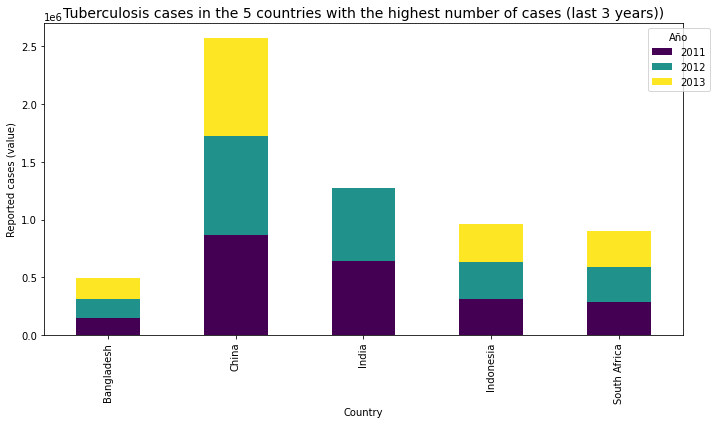

In [31]:
# stacked bars
# Total cases per country over the years (filtering values: top 5 countries, last 3 years)

import pandas as pd
import matplotlib.pyplot as plt


years = sorted(df['year'].unique())[-3:]
df_years = df[df['year'].isin(years)]

top_countries = (
    df_years.groupby("country")["value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

df_top = df_years[df_years["country"].isin(top_countries)]

pivot_df = df_top.pivot_table(
    values="value",
    index="country",
    columns="year",
    aggfunc="sum"
)

pivot_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="viridis"
)

plt.title("Tuberculosis cases in the 5 countries with the highest number of cases (last 3 years))", fontsize=14)
plt.ylabel("Reported cases (value)")
plt.xlabel("Country")
plt.legend(title="Año", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


### Redefine charts with data modeling

In [32]:
by_method = df.groupby("method", as_index=False)["value"].sum()
by_method["percent_of_total"] = 100 * by_method["value"] / by_method["value"].sum()
by_method

,method,value,percent_of_total
0,esputo pulmonar negativo,6279526.0,14.545284
1,esputo pulmonar positivo,31701213.0,73.429611
2,extrapulmonar,1986179.0,4.600592
3,recaida,3205329.0,7.424513


In [33]:
by_method = df.groupby("method", as_index=False)["value"].sum()
by_method["percent_of_total"] = 100 * by_method["value"] / by_method["value"].sum()
by_method

,method,value,percent_of_total
0,esputo pulmonar negativo,6279526.0,14.545284
1,esputo pulmonar positivo,31701213.0,73.429611
2,extrapulmonar,1986179.0,4.600592
3,recaida,3205329.0,7.424513


In [34]:
by_gender = df.groupby("gender", as_index=False)["value"].sum()
by_gender["percent_of_total"] = 100 * by_gender["value"] / by_gender["value"].sum()
by_gender

,gender,value,percent_of_total
0,femenino,15818663.0,36.640815
1,masculino,27353584.0,63.359185


In [35]:
by_agegroup = df.groupby("agegroup", as_index=False)["value"].sum()
by_agegroup["percent_of_total"] = 100 * by_agegroup["value"] / by_agegroup["value"].sum()
by_agegroup

,agegroup,value,percent_of_total
0,0-14,1702349.0,5.065104
1,15-24,7594407.0,22.596106
2,35-44,8720495.0,25.946625
3,45-54,6475709.0,19.267575
4,55-64,4785382.0,14.238242
5,65+,4331019.0,12.886347


In [36]:
by_country = df.groupby("country", as_index=False)["value"].sum()
by_country["percent_of_total"] = 100 * by_country["value"] / by_country["value"].sum()
by_country.sort_values(by="value", ascending=False).head(10)

,country,value,percent_of_total
42,China,8389839.0,19.433408
88,India,7098552.0,16.442396
177,South Africa,3010272.0,6.972702
89,Indonesia,2909925.0,6.740268
16,Bangladesh,1524034.0,3.530124
211,Viet Nam,965665.0,2.236773
55,Democratic Republic of the Congo,960902.0,2.225740
149,Philippines,952828.0,2.207038
157,Russian Federation,926236.0,2.145443
143,Pakistan,905629.0,2.097711


**Incidence rate**  
Per 100,000 habitants  

i = 100000 * cases / poblacion_total

In [37]:
df.head()

,country,year,iso2,iso3,value,gender,agegroup,method,population
0,Afghanistan,1995,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo,17586073
1,Afghanistan,1995,AF,AFG,0.0,masculino,15-24,esputo pulmonar positivo,17586073
2,Afghanistan,1995,AF,AFG,0.0,masculino,None,esputo pulmonar positivo,17586073
3,Afghanistan,1995,AF,AFG,0.0,masculino,35-44,esputo pulmonar positivo,17586073
4,Afghanistan,1995,AF,AFG,0.0,masculino,45-54,esputo pulmonar positivo,17586073


### creation of new dataframes (by country and year and by country)

In [38]:
by_country_year = df.groupby(["country", "year"], as_index=False).agg(
    {"value": "sum", "population": "max"}
)

by_country_year["incidencia"] = 100_000 * by_country_year["value"] / by_country_year["population"]

by_country_year.head(5)

,country,year,value,population,incidencia
0,Afghanistan,1995,0.0,17586073,0.000000
1,Afghanistan,1996,0.0,18415307,0.000000
2,Afghanistan,1997,128.0,19021226,0.672932
3,Afghanistan,1998,1778.0,19496836,9.119428
4,Afghanistan,1999,745.0,19987071,3.727410


In [39]:
by_year = by_country_year.groupby("year", as_index=False).agg(
    {"value":"sum", "population": "sum"}
)

by_year["incidencia"] = 100_000 * by_year["value"] / by_year["population"]

by_year

,year,value,population,incidencia
0,1995,505717.0,5703289735,8.867110
1,1996,628318.0,5781863871,10.867049
2,1997,724163.0,5858936095,12.359974
3,1998,830998.0,5934972576,14.001716
4,1999,986176.0,6010587100,16.407316
5,2000,1148463.0,6086267209,18.869743
6,2001,1227501.0,6162187587,19.919890
7,2002,1512296.0,6239282896,24.238298
8,2003,1849403.0,6315958969,29.281428
9,2004,2172788.0,6393225245,33.985788


In [40]:
by_year.to_csv('by_year')

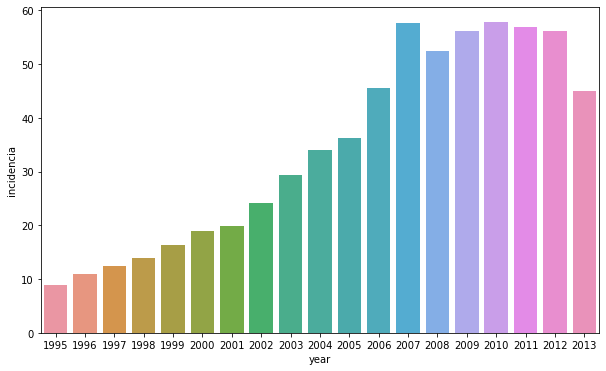

In [41]:
# columnas 
# incidencia por año

plt.figure(figsize=(10, 6)) 
ax = sns.barplot(data=by_year, x="year", y="incidencia")

# Conclusions

The final incidence analysis indicates that while certain countries have achieved sustained reductions in tuberculosis cases, several regions continue to exhibit increasing or stagnant trends. This variability reflects differences in diagnostic capacity, access to treatment, and the effectiveness of epidemiological surveillance systems, underscoring the need for country-specific analysis and targeted interventions.

From an operational and strategic perspective within a global health organization, the outcomes of this project support:

### Improved Decision-Making

 - Identification of priority countries for resource allocation, technical assistance, and targeted public health campaigns.

 - Evaluation of progress toward tuberculosis reduction targets established by international initiatives such as the United Nations Sustainable Development Goals.

### Process Improvement

 - Identification of gaps and inconsistencies in epidemiological reporting mechanisms.

 - Enablement of more agile analytical workflows through automated visualizations and basic predictive modeling.

### Data-Driven Products and Services

 - Foundation for the development of global dashboards to support continuous monitoring of tuberculosis incidence.

 - Opportunities to implement early warning systems based on trend analysis and risk indicators.

 - Prioritizing countries with recent increases in tuberculosis incidence, strengthening surveillance infrastructure, and adopting analytical tools for near real-time evaluation can support more timely decisions, more efficient operations, and accelerated progress toward tuberculosis elimination.